In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.datasets import fetch_kddcup99
import missingno
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
dataset = fetch_kddcup99()
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=dataset['target_names'])],axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [3]:
# Checking for duplicated rows if exist
data[data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
2500,0,b'tcp',b'http',b'SF',307,60990,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2864,0,b'tcp',b'http',b'SF',351,11485,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2977,0,b'tcp',b'http',b'SF',506,2419,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3003,0,b'tcp',b'http',b'SF',319,1374,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3130,0,b'tcp',b'http',b'SF',234,1212,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493142,0,b'tcp',b'http',b'SF',303,480,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493168,0,b'tcp',b'http',b'SF',230,43464,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493325,0,b'tcp',b'http',b'SF',337,398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493750,0,b'tcp',b'http',b'SF',206,998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [4]:
# Removing duplicated records if exist
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [5]:
data.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

In [6]:
data = data.drop(['num_outbound_cmds','is_host_login'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [7]:
data[np.array(data.columns[22:29])] = data[np.array(data.columns[22:29])].astype('float')
data[np.array(data.columns[31:39])] = data[np.array(data.columns[31:39])].astype('float')
data[['protocol_type','service','flag','labels']] = data[['protocol_type','service','flag','labels']].applymap(
                                                    lambda x: x.decode('ascii'))

In [8]:
data['labels'].value_counts()/len(data['labels'])

normal.             0.603300
neptune.            0.355941
back.               0.006649
teardrop.           0.006306
satan.              0.006223
warezclient.        0.006134
ipsweep.            0.004472
smurf.              0.004403
portsweep.          0.002857
pod.                0.001415
nmap.               0.001085
guess_passwd.       0.000364
buffer_overflow.    0.000206
warezmaster.        0.000137
land.               0.000131
imap.               0.000082
rootkit.            0.000069
loadmodule.         0.000062
ftp_write.          0.000055
multihop.           0.000048
phf.                0.000027
perl.               0.000021
spy.                0.000014
Name: labels, dtype: float64

In [9]:
data['labels'] = data['labels'].map(lambda x: 'others' if x not in ['normal.','neptune.'] else x)
data['labels'].value_counts()/len(data['labels'])

normal.     0.603300
neptune.    0.355941
others      0.040759
Name: labels, dtype: float64

In [10]:
integer_columns = np.array(data.select_dtypes(include='object').drop(['protocol_type','service','flag','labels'],axis=1).columns)
data[integer_columns] = data[integer_columns].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int32  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int32  
 5   dst_bytes                    145586 non-null  int32  
 6   land                         145586 non-null  int32  
 7   wrong_fragment               145586 non-null  int32  
 8   urgent                       145586 non-null  int32  
 9   hot                          145586 non-null  int32  
 10  num_failed_logins            145586 non-null  int32  
 11  logged_in                    145586 non-null  int32  
 12  num_compromised              145586 non-null  int32  
 13 

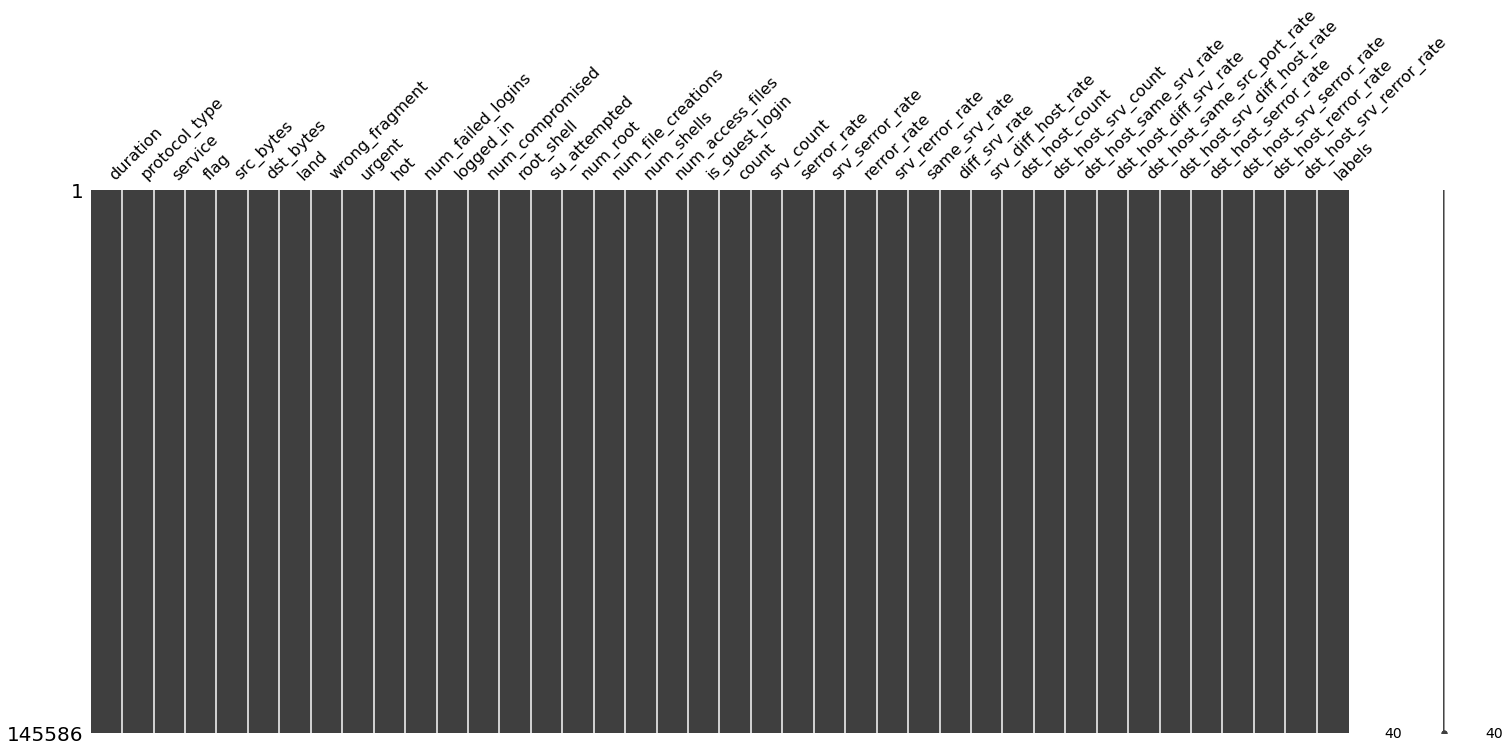

In [11]:
# Checking for missing values of features and labels if exist
missingno.matrix(data)
plt.show()

In [12]:
for column in data.columns[data.nunique()<30]:
    print(data[column].value_counts()/len(data))
    print('')

tcp     0.899214
udp     0.084259
icmp    0.016526
Name: protocol_type, dtype: float64

SF        0.600738
S0        0.290399
REJ       0.101054
RSTO      0.003908
RSTR      0.002919
S1        0.000392
SH        0.000234
S2        0.000165
RSTOS0    0.000076
S3        0.000069
OTH       0.000048
Name: flag, dtype: float64

0    0.999863
1    0.000137
Name: land, dtype: float64

0    0.992300
3    0.006251
1    0.001449
Name: wrong_fragment, dtype: float64

0    0.999973
1    0.000014
2    0.000007
3    0.000007
Name: urgent, dtype: float64

0     0.986558
2     0.006580
28    0.001882
1     0.001752
4     0.000769
6     0.000714
5     0.000350
3     0.000261
14    0.000254
30    0.000192
22    0.000192
19    0.000158
24    0.000089
18    0.000089
20    0.000069
7     0.000034
17    0.000014
12    0.000014
16    0.000007
10    0.000007
15    0.000007
9     0.000007
Name: hot, dtype: float64

0    0.999567
1    0.000392
2    0.000021
5    0.000007
4    0.000007
3    0.000007
Name: num_fa

In [13]:
X = data.drop(['labels'],axis=1)
y = data['labels']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [15]:
# Checking number of unique categories for service variable
X_train['service'].nunique()

64

In [16]:
# Checking frequency of each category type for service variable
X_train['service'].value_counts()

http           43418
private        34362
smtp            6825
domain_u        3774
other           3363
ftp_data        3219
ecr_i            726
eco_i            642
ftp              562
finger           453
telnet           383
urp_i            308
ntp_u            209
auth             207
pop_3            154
time             105
mtp               86
iso_tsap          84
csnet_ns          84
discard           82
sql_net           82
vmnet             81
domain            80
gopher            80
whois             80
rje               79
systat            79
remote_job        79
klogin            78
echo              78
imap4             78
hostnames         77
supdup            76
kshell            75
bgp               73
login             73
nntp              73
ssh               73
nnsp              72
pop_2             72
shell             72
courier           72
printer           71
netbios_ssn       71
uucp_path         70
Z39_50            69
sunrpc            69
netbios_dgm  

In [17]:
# Hash encoding on Service variable
hashencoder = ce.hashing.HashingEncoder(cols='service', n_components=8)
X_train_encoded = hashencoder.fit_transform(X_train, y_train)
X_test_encoded = hashencoder.transform(X_test, y_test)

X_train_encoded = X_train_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})
X_test_encoded = X_test_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})

In [18]:
# One hot encoding on protocol_type and flag variable
onehotencoder = ce.OneHotEncoder(cols=['protocol_type','flag'])
X_train_encoded = onehotencoder.fit_transform(X_train_encoded)
X_test_encoded = onehotencoder.transform(X_test_encoded)

In [19]:
# Random Forest classifier with default hyperparameters
clf = RandomForestClassifier()
clf.fit(X_train_encoded, y_train)
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   1.000000  1.000000  1.000000     15596
     normal.   0.999052  0.999659  0.999355     26360
      others   0.994718  0.985465  0.990070      1720

    accuracy                       0.999222     43676
   macro avg   0.997923  0.995041  0.996475     43676
weighted avg   0.999220  0.999222  0.999220     43676



In [20]:
def cf_matrix_plot(cf_matrix, labeled):
    """
        Plots a confusion matrix for binary classification problem using heatmaps.
    """
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2f}%" for value in cf_matrix.flatten()/np.sum(cf_matrix)*100]
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    plt.figure(figsize=(15,8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=labeled,yticklabels=labeled)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.show()

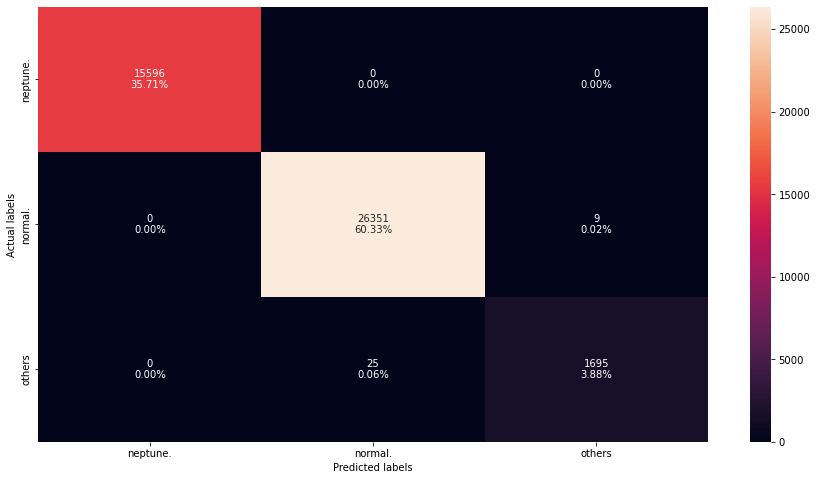

In [21]:
# Confusion matrix heatmap
y_pred = clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

All machine learning models have hyperparameters, which are model configuration arguments specified by the developer to guide the model learning process for a specific dataset.

Hyperparameter tuning is essential for maximizing model performance.

The following sections below shows the types of hyperparameter tuning techniques available:

1. Randomized Search CV
2. Grid Search CV
3. Bayesian Optimization
4. Genetics Algorithm
5. Optuna

## Randomized Search CV

Randomized search CV involves defining a search space as a bounded domain of hyperparameter values and randomly sample points within that domain.

Randomized search CV is mostly suitable for initial search of hyperparameter values that provides reasonably good model performance within a very large search space.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'criterion': ['gini','entropy'], 
              'n_estimators': list(range(10,100)), 
              'max_depth': [None,2,3,4,5,6,7,8,9,10],
              'min_samples_split': list(range(2,10)),
              'min_samples_leaf': list(range(1,10)),
              'max_features': ['auto', 'sqrt', 'log2',None],
              'max_leaf_nodes': [None,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'min_impurity_decrease': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'class_weight': ['balanced','balanced_subsample',None]}
clf_rand_cv = RandomizedSearchCV(RandomForestClassifier(),param_grid,cv=3,n_jobs=-1,verbose=1,
                                 scoring='balanced_accuracy',n_iter=50,random_state=42)
clf_rand_cv.fit(X_train_encoded, y_train)
clf_rand_cv.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 88,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0,
 'max_leaf_nodes': 9,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': 'balanced_subsample'}

In [23]:
best_clf = clf_rand_cv.best_estimator_
y_pred = best_clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   0.999744  0.999872  0.999808     15596
     normal.   0.999552  0.931487  0.964320     26360
      others   0.485625  0.991860  0.652016      1720

    accuracy                       0.958284     43676
   macro avg   0.828307  0.974406  0.872048     43676
weighted avg   0.979382  0.958284  0.964693     43676



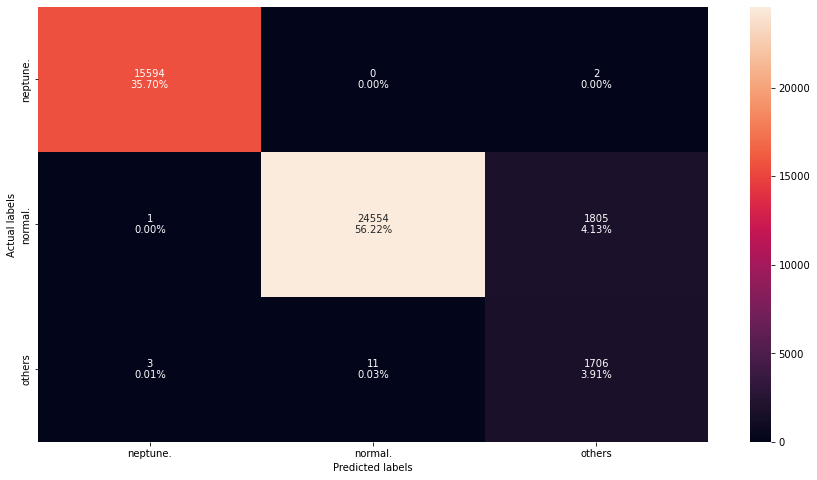

In [24]:
# Confusion matrix heatmap
y_pred = best_clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

## Grid Search CV

Grid search CV involves defining a search space as a bounded domain of hyperparameter values and evaluate model performance for all possible combinations of values within the search space.

Grid search CV is preferable for more concise search spaces, as execution time increases significantly for very large search spaces.

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': [clf_rand_cv.best_params_['criterion']], 
              'n_estimators': [clf_rand_cv.best_params_['n_estimators']-2,
                               clf_rand_cv.best_params_['n_estimators']-1,
                               clf_rand_cv.best_params_['n_estimators'],
                               clf_rand_cv.best_params_['n_estimators']+1,
                               clf_rand_cv.best_params_['n_estimators']+2], 
              'max_depth': [clf_rand_cv.best_params_['max_depth']-2,
                           clf_rand_cv.best_params_['max_depth']-1,
                           clf_rand_cv.best_params_['max_depth'],
                           clf_rand_cv.best_params_['max_depth']+1,
                           clf_rand_cv.best_params_['max_depth']+2],
              'min_samples_split': [clf_rand_cv.best_params_['min_samples_split']],
              'min_samples_leaf': [clf_rand_cv.best_params_['min_samples_leaf']],
              'max_features': [clf_rand_cv.best_params_['max_features']],
              'max_leaf_nodes': [clf_rand_cv.best_params_['max_leaf_nodes']],
              'min_impurity_decrease': [clf_rand_cv.best_params_['min_impurity_decrease']],
              'class_weight': [clf_rand_cv.best_params_['class_weight']]}
clf_grid_cv = GridSearchCV(RandomForestClassifier(),param_grid,cv=3,n_jobs=-1,verbose=1,scoring='balanced_accuracy')
clf_grid_cv.fit(X_train_encoded, y_train)
clf_grid_cv.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 89}

In [26]:
best_clf = clf_grid_cv.best_estimator_
y_pred = best_clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   0.999423  0.999936  0.999679     15596
     normal.   0.999104  0.931108  0.963908     26360
      others   0.482031  0.982558  0.646766      1720

    accuracy                       0.957711     43676
   macro avg   0.826853  0.971201  0.870118     43676
weighted avg   0.978855  0.957711  0.964192     43676



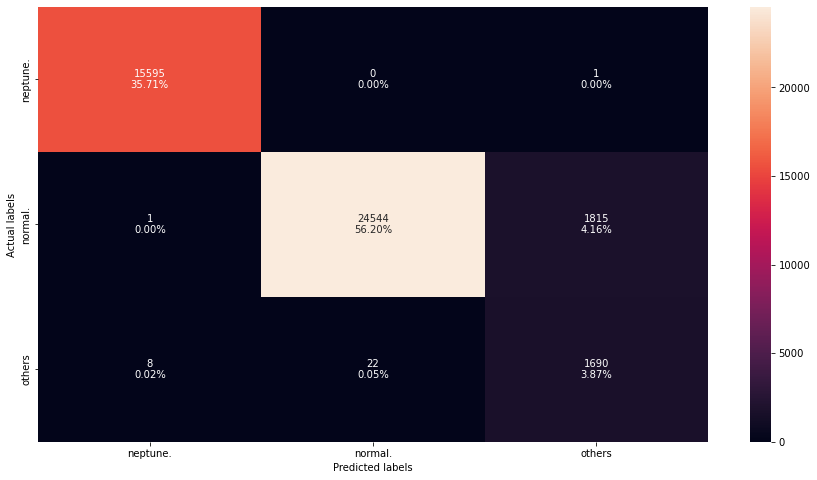

In [27]:
# Confusion matrix heatmap
y_pred = best_clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

## Bayesian Optimization

For hyperparameter tuning, bayesian optimization uses probability to find the minimum value of an objective function.

This method usually provides better model performance than random search and grid search, while reducing optimization time.

The following parameters can be passed to the function fmin for bayesian optimization:

1. <b>Objective function</b>: Defines the loss function to minimize.

2. <b>Domain space</b>: Defines the range of input values to test.

3. <b>Optimization algorithm</b>: Defines the search algorithm to use to select the best input values to use in each new iteration.

In [28]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll import scope

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
         'class_weight': hp.choice('class_weight',['balanced','balanced_subsample',None]),
        'max_depth': scope.int(hp.quniform('max_depth', 2, 10,1)),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 10,1)),
        'min_samples_split' : scope.int(hp.quniform ('min_samples_split', 2, 10,1)),
        'n_estimators' : scope.int(hp.quniform('n_estimators', 10,100,1)),
        'min_impurity_decrease' : hp.uniform('min_impurity_decrease', 0,1),
        'max_leaf_nodes': scope.int(hp.quniform('max_leaf_nodes',2,15,1))}

In [29]:
from sklearn.model_selection import cross_val_score
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                   max_features = space['max_features'],
                                   min_samples_leaf = space['min_samples_leaf'],
                                   min_samples_split = space['min_samples_split'],
                                   n_estimators = space['n_estimators'],
                                   class_weight = space['class_weight'],
                                   min_impurity_decrease = space['min_impurity_decrease'], 
                                   max_leaf_nodes = space['max_leaf_nodes']
                                 )

    accuracy = cross_val_score(model, X_train_encoded, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [30]:
trials = Trials()
best = fmin(fn= objective, space= space, algo= tpe.suggest, max_evals = 80, trials= trials)
best

100%|███████████████████████████████████████████████| 80/80 [18:40<00:00, 14.00s/trial, best loss: -0.9749975468550682]


{'class_weight': 0,
 'criterion': 0,
 'max_depth': 9.0,
 'max_features': 0,
 'max_leaf_nodes': 15.0,
 'min_impurity_decrease': 0.01781077630986949,
 'min_samples_leaf': 3.0,
 'min_samples_split': 4.0,
 'n_estimators': 57.0}

In [33]:
criterion = {0: 'entropy', 1: 'gini'}
class_weight = {0: 'balanced', 1: 'balanced_subsample', 2: None}
max_features = {0: 'auto', 1: 'sqrt', 2: 'log2', 3:None}

In [35]:
clf = RandomForestClassifier(criterion=criterion[best['criterion']],
                            class_weight=class_weight[best['class_weight']],
                            max_depth = best['max_depth'],
                            max_features = max_features[best['max_features']],
                            max_leaf_nodes = int(best['max_leaf_nodes']),
                            min_impurity_decrease = best['min_impurity_decrease'],
                            min_samples_leaf = int(best['min_samples_leaf']),
                            min_samples_split = int(best['min_samples_split']),
                            n_estimators = int(best['n_estimators']))
clf.fit(X_train_encoded,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9.0, max_leaf_nodes=15,
                       min_impurity_decrease=0.01781077630986949,
                       min_samples_leaf=3, min_samples_split=4,
                       n_estimators=57)

In [36]:
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   0.999936  0.999487  0.999711     15596
     normal.   0.999067  0.974469  0.986614     26360
      others   0.713805  0.986047  0.828125      1720

    accuracy                       0.983858     43676
   macro avg   0.904269  0.986667  0.938150     43676
weighted avg   0.988143  0.983858  0.985050     43676



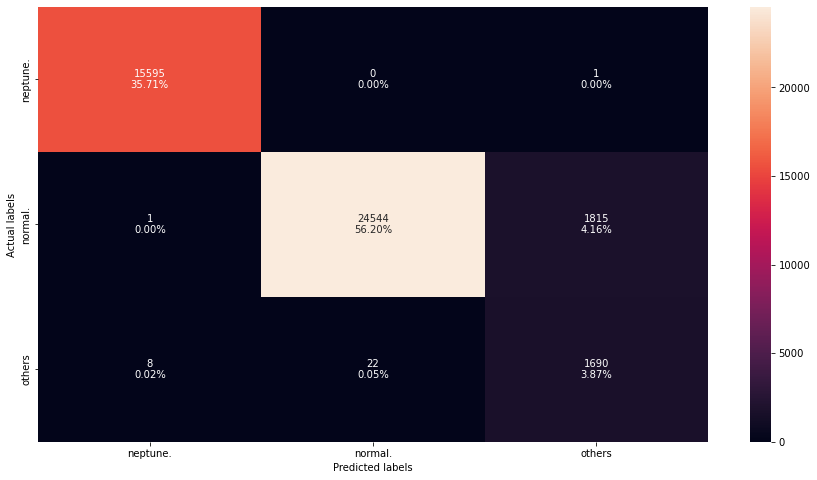

In [37]:
# Confusion matrix heatmap
y_pred = best_clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

## Genetics Algorithm

Genetics algorithm attempts to apply natural selection mechanisms to determine best machine learning models to use.

By having a population of N machine learning models with different hyperparameters, scoring of each model is computed and a proportion of models are kept for generating N offsprings having similar hyperparameters to the best ones identified.

The cycle repeats for a defined number of generations, such that only the best models will remain at the end of the algorithm.

In [38]:
param_grid = {'criterion': ['gini','entropy'], 
              'n_estimators': list(range(10,100)), 
              'max_depth': [None,2,3,4,5,6,7,8,9,10],
              'min_samples_split': list(range(2,10)),
              'min_samples_leaf': list(range(1,10)),
              'max_features': ['auto', 'sqrt', 'log2',None],
              'max_leaf_nodes': [None,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'min_impurity_decrease': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'class_weight': ['balanced','balanced_subsample',None]}

In [39]:
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12, verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param_grid}, 
                                 cv = 5, scoring = 'balanced_accuracy')
tpot_classifier.fit(X_train_encoded,y_train)

C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(


Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8256963750409698

Generation 2 - Current best internal CV score: 0.8414343547503134

Generation 3 - Current best internal CV score: 0.9857719969247063

Generation 4 - Current best internal CV score: 0.9857719969247063

Generation 5 - Current best internal CV score: 0.9857719969247063

Best pipeline: RandomForestClassifier(input_matrix, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, max_leaf_nodes=13, min_impurity_decrease=0, min_samples_leaf=5, min_samples_split=5, n_estimators=10)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'class_weight': ['balanced',
                                                                                         'balanced_subsample',
                                                                                         None],
                                                                        'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': [None,
                                                                                      2,
                                                                                      3,
                                                                                      4,
                                                                                      5,
                                                    

In [40]:
y_pred = tpot_classifier.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   0.999167  0.999872  0.999519     15596
     normal.   0.998764  0.981222  0.989915     26360
      others   0.772099  0.975000  0.861768      1720

    accuracy                       0.987636     43676
   macro avg   0.923344  0.985364  0.950401     43676
weighted avg   0.989982  0.987636  0.988298     43676



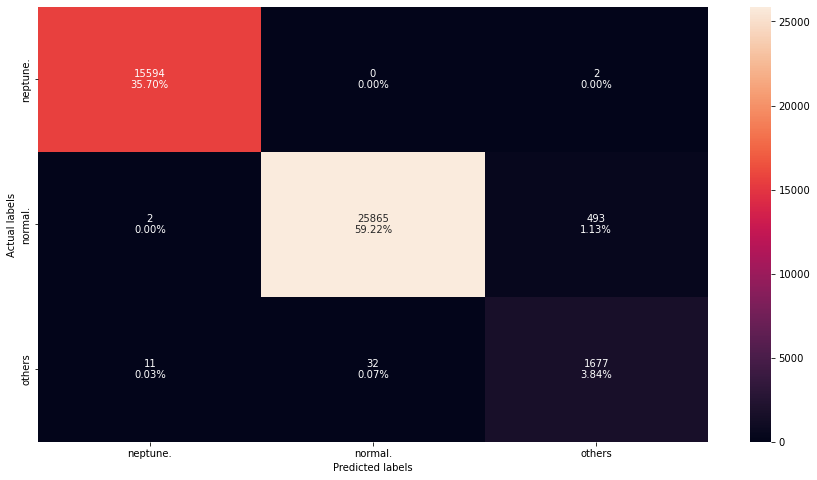

In [41]:
# Confusion matrix heatmap
y_pred = tpot_classifier.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

## Optuna

Optuna is an automatic hyperparameter optimization software framework, particularly designed for machine learning.

Unlike other hyperparameter optimization frameworks, Optuna sets itself apart from others with the following unique features:

1. Efficient optimization algorithms that prunes unpromising trials

2. Easy parallelization for optimizing multiple models simultaneously.

Terminologies used in Optuna:
- <b>Study</b>: optimization based on an objective function
- <b>Trial</b>: a single execution of the objective function

In [42]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100,1)
    max_depth = trial.suggest_int('max_depth', 2, 10,1)
    criterion = trial.suggest_categorical('criterion', ['gini','entropy'])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10,1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10,1)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2',None])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 15,1)
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0, 1)
    class_weight = trial.suggest_categorical('class_weight', ['balanced','balanced_subsample',None])

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion, 
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                max_features=max_features,max_leaf_nodes=max_leaf_nodes,
                                 min_impurity_decrease=min_impurity_decrease,class_weight=class_weight)

    return cross_val_score(clf,X_train_encoded,y_train, n_jobs=-1, cv=5).mean()

In [43]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-18 20:51:20,045] A new study created in memory with name: no-name-6b552d14-ade4-42e3-9464-e2eabe2ee388
[I 2022-02-18 20:51:26,540] Trial 0 finished with value: 0.6031989009910707 and parameters: {'n_estimators': 37, 'max_depth': 5, 'criterion': 'gini', 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_leaf_nodes': 13, 'min_impurity_decrease': 0.8470823321208176, 'class_weight': None}. Best is trial 0 with value: 0.6031989009910707.
[I 2022-02-18 20:51:31,375] Trial 1 finished with value: 0.6031989009910707 and parameters: {'n_estimators': 91, 'max_depth': 3, 'criterion': 'gini', 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.9930581643563753, 'class_weight': None}. Best is trial 0 with value: 0.6031989009910707.
[I 2022-02-18 20:51:35,426] Trial 2 finished with value: 0.2660975370424885 and parameters: {'n_estimators': 31, 'max_depth': 2, 'criterion': 'entropy', 'min_samples_spl

[I 2022-02-18 20:54:13,526] Trial 22 finished with value: 0.9641448336767736 and parameters: {'n_estimators': 60, 'max_depth': 6, 'criterion': 'entropy', 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': None, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.027624475520387826, 'class_weight': None}. Best is trial 21 with value: 0.9811205966048474.
[I 2022-02-18 20:54:22,508] Trial 23 finished with value: 0.9504170346384063 and parameters: {'n_estimators': 54, 'max_depth': 8, 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None, 'max_leaf_nodes': 14, 'min_impurity_decrease': 0.22894671216322787, 'class_weight': None}. Best is trial 21 with value: 0.9811205966048474.
[I 2022-02-18 20:54:35,968] Trial 24 finished with value: 0.9504170346384063 and parameters: {'n_estimators': 85, 'max_depth': 9, 'criterion': 'entropy', 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': None, 'max_leaf_nodes': 12, 'min_impurity_decrease': 0.1

[I 2022-02-18 20:58:48,470] Trial 44 finished with value: 0.9504072220586792 and parameters: {'n_estimators': 84, 'max_depth': 7, 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.11838841313840323, 'class_weight': None}. Best is trial 33 with value: 0.9933666961044059.
[I 2022-02-18 20:59:17,752] Trial 45 finished with value: 0.9766068099303306 and parameters: {'n_estimators': 96, 'max_depth': 8, 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0016565333422585361, 'class_weight': None}. Best is trial 33 with value: 0.9933666961044059.
[I 2022-02-18 20:59:27,140] Trial 46 finished with value: 0.950260033362771 and parameters: {'n_estimators': 51, 'max_depth': 8, 'criterion': 'entropy', 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': None, 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.

[I 2022-02-18 21:04:34,975] Trial 66 finished with value: 0.9502894711019527 and parameters: {'n_estimators': 67, 'max_depth': 4, 'criterion': 'gini', 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': None, 'max_leaf_nodes': 13, 'min_impurity_decrease': 0.11883416932342963, 'class_weight': None}. Best is trial 33 with value: 0.9933666961044059.
[I 2022-02-18 21:04:53,193] Trial 67 finished with value: 0.9636640172701403 and parameters: {'n_estimators': 62, 'max_depth': 9, 'criterion': 'entropy', 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': None, 'max_leaf_nodes': 14, 'min_impurity_decrease': 0.033224089562329244, 'class_weight': None}. Best is trial 33 with value: 0.9933666961044059.
[I 2022-02-18 21:05:06,132] Trial 68 finished with value: 0.9504072220586792 and parameters: {'n_estimators': 73, 'max_depth': 6, 'criterion': 'entropy', 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': None, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.075

[I 2022-02-18 21:10:36,365] Trial 88 finished with value: 0.9931213816112257 and parameters: {'n_estimators': 74, 'max_depth': 10, 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'max_leaf_nodes': 14, 'min_impurity_decrease': 0.0003948911243583349, 'class_weight': None}. Best is trial 82 with value: 0.9933765086841332.
[I 2022-02-18 21:10:44,089] Trial 89 finished with value: 0.6031989009910707 and parameters: {'n_estimators': 74, 'max_depth': 9, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'max_leaf_nodes': 13, 'min_impurity_decrease': 0.9958791601045142, 'class_weight': None}. Best is trial 82 with value: 0.9933765086841332.
[I 2022-02-18 21:10:56,696] Trial 90 finished with value: 0.9504170346384063 and parameters: {'n_estimators': 72, 'max_depth': 8, 'criterion': 'entropy', 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': None, 'max_leaf_nodes': 11, 'min_impurity_decrease': 0.395

Accuracy: 0.9933765086841332
Best hyperparameters: {'n_estimators': 83, 'max_depth': 9, 'criterion': 'entropy', 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': None, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0031088961493378605, 'class_weight': None}


In [44]:
clf = RandomForestClassifier(criterion=trial.params['criterion'],
                            class_weight=trial.params['class_weight'],
                            max_depth = trial.params['max_depth'],
                            max_features = trial.params['max_features'],
                            max_leaf_nodes = trial.params['max_leaf_nodes'],
                            min_impurity_decrease = trial.params['min_impurity_decrease'],
                            min_samples_leaf = trial.params['min_samples_leaf'],
                            min_samples_split = trial.params['min_samples_split'],
                            n_estimators = trial.params['n_estimators'])
clf.fit(X_train_encoded,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=None,
                       max_leaf_nodes=15,
                       min_impurity_decrease=0.0031088961493378605,
                       min_samples_leaf=6, min_samples_split=3,
                       n_estimators=83)

In [45]:
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   0.998271  0.999295  0.998782     15596
     normal.   0.994733  0.995827  0.995280     26360
      others   0.930149  0.905814  0.917820      1720

    accuracy                       0.993520     43676
   macro avg   0.974384  0.966979  0.970627     43676
weighted avg   0.993453  0.993520  0.993480     43676



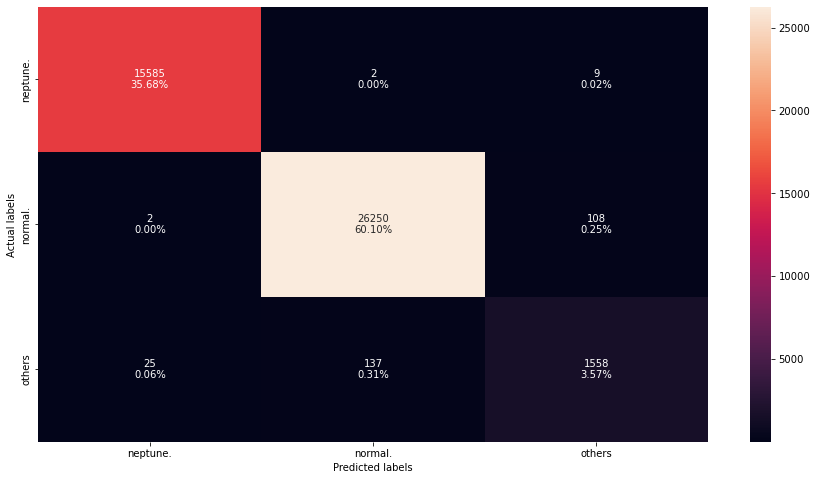

In [46]:
# Confusion matrix heatmap
y_pred = clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])